# Dhruv Miyani PA 3 _ Part 1

In [6]:
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Dataset

In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.8 MB/s eta 0:00:00


In [5]:
import datasets as ds
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from rouge_score import rouge_scorer

In [4]:
! pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=d3940644e041386b6818262e2bfdd753d5f4cc89a9d834726e8b4e44b9d9ec68
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [7]:
from datasets import load_dataset
dataset = load_dataset("samsum")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

In [8]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [9]:
data_files = {"train": "train.csv", "test": "test.csv"}
dataset = load_dataset("samsum")

In [10]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [11]:

df_train = pd.DataFrame(dataset["train"])
df_test = pd.DataFrame(dataset["test"])



In [12]:
df_vaild = pd.DataFrame(dataset["validation"])

## EDA On Train Dataset

In [9]:
df_train.head()

,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,13728094,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com..."


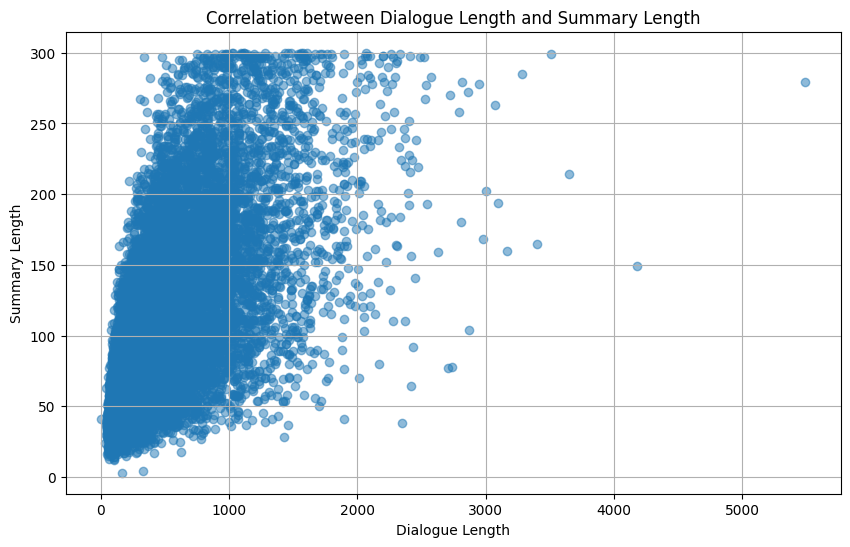

                 dialogue_length  summary_length
dialogue_length         1.000000        0.622455
summary_length          0.622455        1.000000


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_train is your DataFrame and it contains 'dialogue' and 'summary' columns
# Calculate lengths
df_train['dialogue_length'] = df_train['dialogue'].str.len()
df_train['summary_length'] = df_train['summary'].str.len()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_train['dialogue_length'], df_train['summary_length'], alpha=0.5)
plt.title('Correlation between Dialogue Length and Summary Length')
plt.xlabel('Dialogue Length')
plt.ylabel('Summary Length')
plt.grid(True)
plt.show()

# Calculate and print Pearson correlation coefficient
correlation = df_train[['dialogue_length', 'summary_length']].corr()
print(correlation)


In [11]:
train_texts = list(df_train['dialogue'])
test_texts = list(df_test['dialogue'])
val_texts = list(df_vaild['dialogue'])

train_decode = list(df_train['summary'])
test_decode = list(df_test['summary'])
val_decode = list(df_vaild ['summary'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


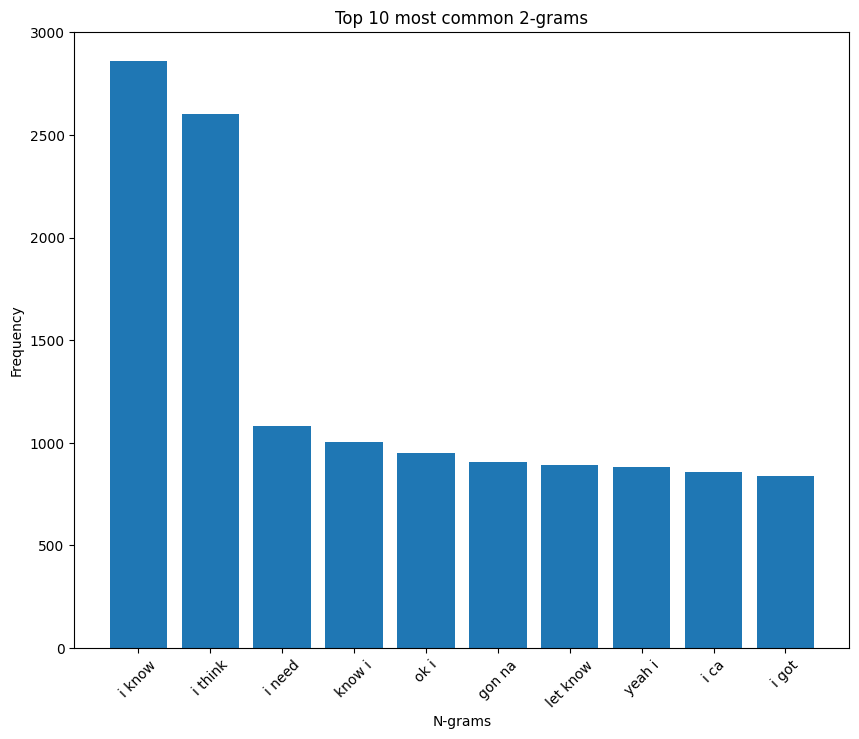

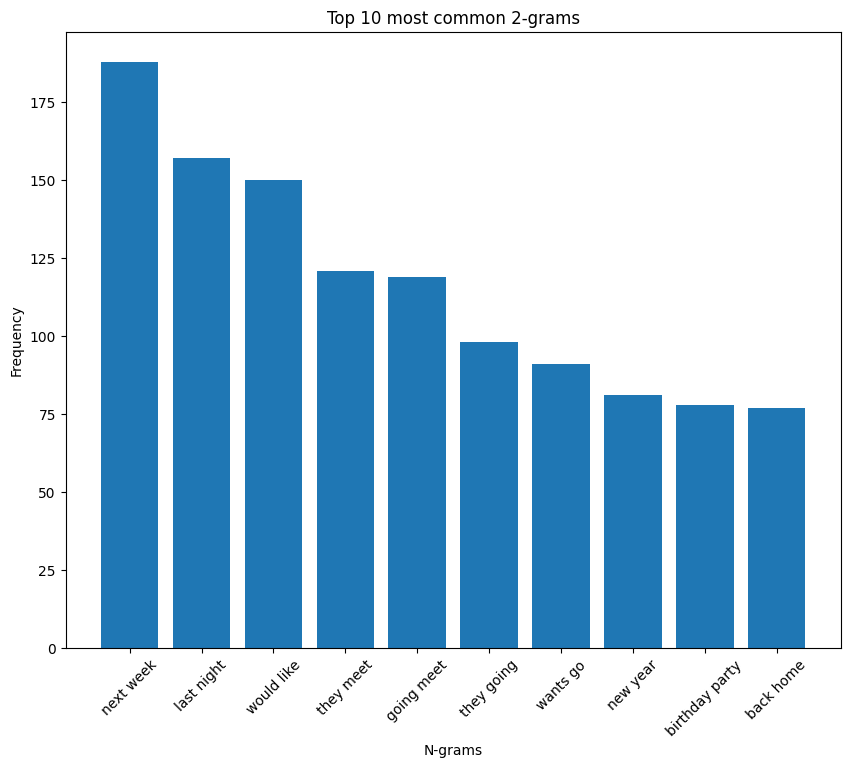

In [13]:
import nltk
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Function to generate and plot N-grams
def plot_ngrams(text_list, n=2, num_most_common=10):
    # Concatenate all texts
    all_text = ' '.join(text_list)

    # Tokenize the text
    tokens = word_tokenize(all_text)

    # Remove stopwords and non-alphabetic words
    tokens = [word.lower() for word in tokens if word.isalpha() and word not in stopwords.words('english')]

    # Generate N-grams
    n_grams = list(nltk.ngrams(tokens, n))

    # Count and display the most common N-grams
    n_gram_freq = Counter(n_grams)
    most_common_n_grams = n_gram_freq.most_common(num_most_common)

    # Prepare data for plotting
    n_grams_str = [' '.join(gram) for gram, _ in most_common_n_grams]
    counts = [count for _, count in most_common_n_grams]

    # Plot
    plt.figure(figsize=(10, 8))
    plt.bar(n_grams_str, counts)
    plt.xlabel('N-grams')
    plt.ylabel('Frequency')
    plt.title(f'Top {num_most_common} most common {n}-grams')
    plt.xticks(rotation=45)
    plt.show()

# Example usage with your data
plot_ngrams(train_texts, n=2, num_most_common=10) # For dialogues
plot_ngrams(train_decode, n=2 ,num_most_common=10)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        819 non-null    object
 1   dialogue  819 non-null    object
 2   summary   819 non-null    object
dtypes: object(3)
memory usage: 19.3+ KB


In [ ]:
"""
df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')
"""

In [ ]:
#Number of columns:
df_train.shape[1]

3

In [ ]:
# dtypes
df_train.dtypes

id          object
dialogue    object
summary     object
dtype: object

In [ ]:
#Data Description:
#Number of rows:
df_train.shape[0]

14732

In [ ]:
# Missing Values:
#Check for missing values in each column:
df_train.isnull().sum()

id          0
dialogue    0
summary     0
dtype: int64

In [ ]:
#Descriptive Statistics:
# Calculate descriptive statistics for numerical columns:
df_train.describe()

,id,dialogue,summary
count,14732,14732,14732
unique,14732,14265,14730
top,13818513,"Jimmy: Hey, guess what? My car's completely ka...",Seth's pet Oreo that he got when he was 10 is ...
freq,1,4,2


### Length of Dialogues

<Axes: >

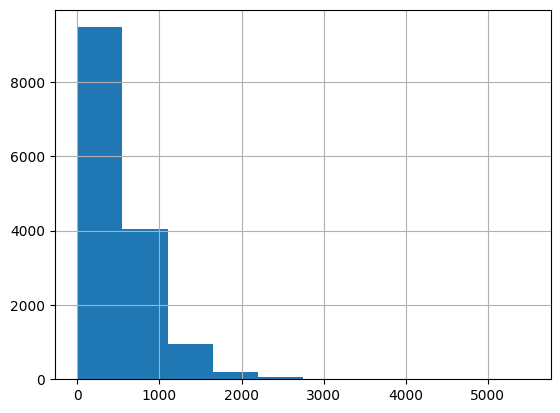

In [ ]:
df_train['dialogue'].str.len().hist()

### Length of summary

<Axes: >

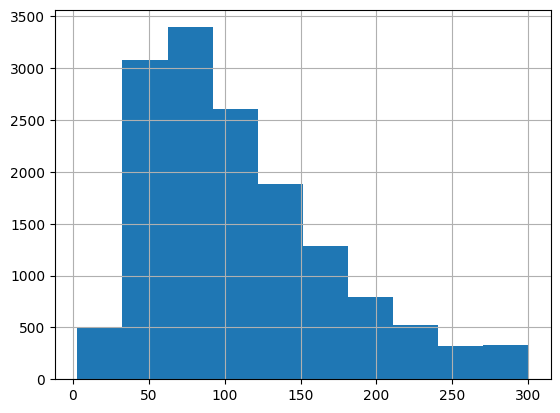

In [ ]:
df_train['summary'].str.len().hist()

In [ ]:
df_train['dialogue'][1]

'Olivia: Who are you voting for in this election? \r\nOliver: Liberals as always.\r\nOlivia: Me too!!\r\nOliver: Great'

## EDA on Test dataset

In [ ]:
df_test.head()

,id,dialogue,summary
0,13862856,"Hannah: Hey, do you have Betty's number?\nAman...",Hannah needs Betty's number but Amanda doesn't...
1,13729565,Eric: MACHINE!\r\nRob: That's so gr8!\r\nEric:...,Eric and Rob are going to watch a stand-up on ...
2,13680171,"Lenny: Babe, can you help me with something?\r...",Lenny can't decide which trousers to buy. Bob ...
3,13729438,"Will: hey babe, what do you want for dinner to...",Emma will be home soon and she will let Will k...
4,13828600,"Ollie: Hi , are you in Warsaw\r\nJane: yes, ju...",Jane is in Warsaw. Ollie and Jane has a party....


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        819 non-null    object
 1   dialogue  819 non-null    object
 2   summary   819 non-null    object
dtypes: object(3)
memory usage: 19.3+ KB


In [ ]:
df_test.shape[1]


3

In [ ]:
# dtypes
df_test.dtypes

id          object
dialogue    object
summary     object
dtype: object

In [ ]:
df_test.shape[0]

14732

In [ ]:
# Missing Values:
#Check for missing values in each column:
df_test.isnull().sum()

id          0
dialogue    0
summary     0
dtype: int64

In [ ]:
#Descriptive Statistics:
# Calculate descriptive statistics for numerical columns:
df_test.describe()

,id,dialogue,summary
count,819,819,819
unique,819,819,819
top,13862856,"Hannah: Hey, do you have Betty's number?\nAman...",Hannah needs Betty's number but Amanda doesn't...
freq,1,1,1


## Inference with Pre-trained Models:

In [ ]:
from transformers import pipeline

# Define the dialogues you want to summarize
dialogues = [" My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?” Mr. Bennet replied that he had not. “But it is,” returned she; “for Mrs. Long has just been here, and she told me all about it.” Mr. Bennet made no answer. “Do you not want to know who has taken it?” cried his wife impatiently. “You want to tell me, and I have no objection to hearing it.” This was invitation enough. “Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the place, and was so much delighted with it, that he agreed with Mr. Morris immediately; that he is to take possession before Michaelmas, and some of his servants are to be in the house by the end of next week ” " ,

             " Tommy,” I said, quite sternly. “There’s mud all over your shirt.” “So what?” he mumbled. But even as he said this, he looked down and noticed the brown specks, and only just stopped himself crying out in alarm. Then I saw the surprise register on his face that I should know about his feelings for the polo shirt. “It’s nothing to worry about.” I said, before the silence got humiliating for him. “It’ll come off. If you can’t get it off yourself, just take it to Miss Jody.” He went on examining his shirt, then said grumpily, “It’s nothing to do with you anyway.” ",

             "Client: Good afternoon. I suggest you adjust the timetable to the reality on the Polish roads. P6 bus Radom - Warsaw, arriving from Cracow, 40 minutes delay. Client: And it was not the first time, there was one hour delay not so long ago... Flix: Hi Marta. We are very sorry that the bus arrived late, but they are operational delays which we have no control over. Apologies. Client: But this happens too often. Why don't you consider rearranging the timetable?? Client: I was waiting at the station from 17.10, hoping to get the bus at 17.25. It arrived at 18.10. One hour waiting. Client: It hardly ever happens that the bus arrives on time. The timetable is too optimistic. I understand there are traffic jams but... Flix: Thank you for the information, we will inform our managers about it. Client: Can I make a formal complaint? I had a similar situation last year. Flix: Sure, you can send a complaint by email to info@flix.com. Client: thanks, I will definitely. But I really hope you do something about it this time... Flix: yes, all complaints are addressed by our managers. Client: great. They should not just read them, but do something about it. Will you inform me about the status? Flix: We don't do that automatically, but you can call us and find out. You can find all the necessary info on our website. Client: Ok, I see. Flix: Once again apologies."
             ]


# Define the models to use
model_names = [
    "facebook/bart-large-cnn",
    "t5-large",
    "google/pegasus-xsum"
]

# Loop through each model and generate summaries for each dialogue
for model_name in model_names:
    print(f"Summaries by {model_name}:")
    summarizer = pipeline("summarization", model=model_name)

    for dialogue in dialogues:
        summary = summarizer(dialogue, max_length=130, min_length=30, do_sample=False)
        print(f"Original: {dialogue}")
        print(f"Summary: {summary[0]['summary_text']}\n")

    print("-" * 80)


Summaries by facebook/bart-large-cnn:


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Original:  My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?” Mr. Bennet replied that he had not. “But it is,” returned she; “for Mrs. Long has just been here, and she told me all about it.” Mr. Bennet made no answer. “Do you not want to know who has taken it?” cried his wife impatiently. “You want to tell me, and I have no objection to hearing it.” This was invitation enough. “Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the place, and was so much delighted with it, that he agreed with Mr. Morris immediately; that he is to take possession before Michaelmas, and some of his servants are to be in the house by the end of next week ” 
Summary: Mr. Bennet's wife told him that Netherfield Park had been let. She said it had been taken by a young man of large fortune from the north of England.

Origin

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Original:  My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?” Mr. Bennet replied that he had not. “But it is,” returned she; “for Mrs. Long has just been here, and she told me all about it.” Mr. Bennet made no answer. “Do you not want to know who has taken it?” cried his wife impatiently. “You want to tell me, and I have no objection to hearing it.” This was invitation enough. “Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the place, and was so much delighted with it, that he agreed with Mr. Morris immediately; that he is to take possession before Michaelmas, and some of his servants are to be in the house by the end of next week ” 
Summary: netherfield park is let at last by a young man of large fortune from the north of england . the man is to take possession before michaelmas, and some of his

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Original:  My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?” Mr. Bennet replied that he had not. “But it is,” returned she; “for Mrs. Long has just been here, and she told me all about it.” Mr. Bennet made no answer. “Do you not want to know who has taken it?” cried his wife impatiently. “You want to tell me, and I have no objection to hearing it.” This was invitation enough. “Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the place, and was so much delighted with it, that he agreed with Mr. Morris immediately; that he is to take possession before Michaelmas, and some of his servants are to be in the house by the end of next week ” 
Summary: The story begins with the Bennet family, who had lived in Netherfield Park for more than a hundred years, and had owned it for many more.

Original:  Tommy,

### Rouge scorer

In [ ]:

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Example reference and generated summaries
reference_summary = "Client informs Flix about a 40 minutes delay of the bus from Radom to Warsaw. Flix explains that this is an operational delay. Client decides to make a formal complaint as it wasn't the first such delay."
generated_summary = " Flix: we are very sorry that the bus arrived late . but they are operational delays which we have no control over . the timetable is too optimistic. "


# Calculate ROUGE scores
scores = scorer.score(reference_summary, generated_summary)

print("ROUGE-1:", scores['rouge1'].fmeasure)
print("ROUGE-2:", scores['rouge2'].fmeasure)
print("ROUGE-L:", scores['rougeL'].fmeasure)


ROUGE-1: 0.25
ROUGE-2: 0.06451612903225806
ROUGE-L: 0.18749999999999997
